In [114]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [117]:
df.isnull().sum()

,0
Category,0
Resume,0


In [118]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [121]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


In [126]:
df.shape

(962, 4)

In [123]:
#Performing EDA

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|mailto:\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_resume'] = df['Resume'].apply(clean_text)
df[['Resume', 'cleaned_resume', 'Category']].head()


,Resume,cleaned_resume,Category
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,Data Science
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may uitrgpv data scienti...,Data Science
2,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,Data Science
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â r â python â sap hana â tableau â sap...,Data Science
4,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,Data Science


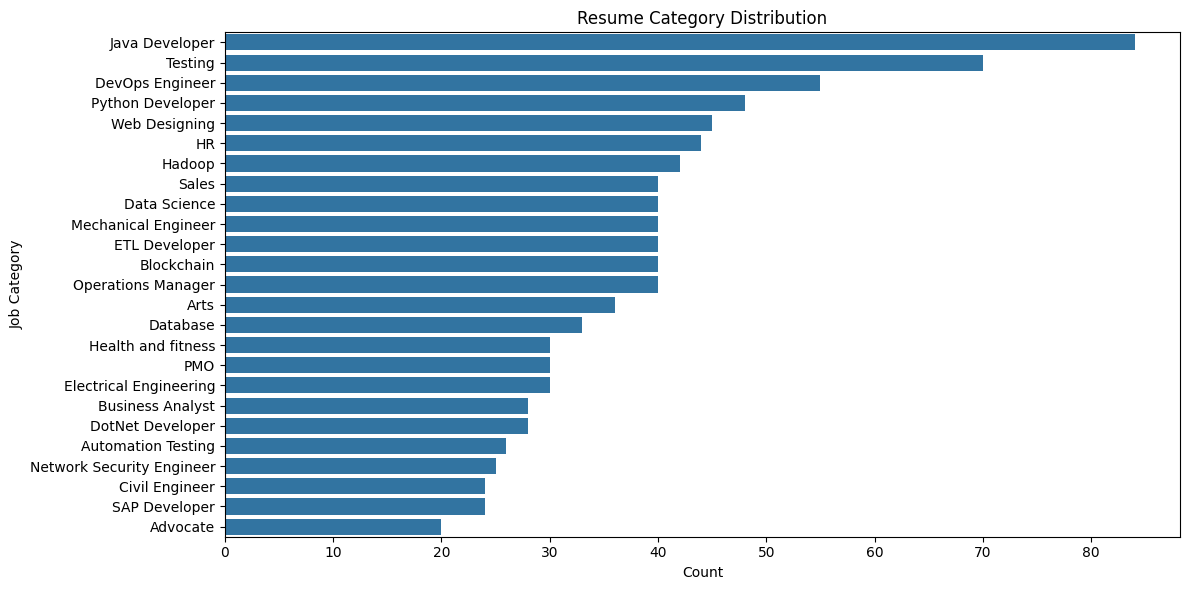

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()


In [125]:
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

#  print mapping
for i, label in enumerate(le.classes_):
    print(f"{label} → {i}")

y = df['Category_encoded']


Advocate → 0
Arts → 1
Automation Testing → 2
Blockchain → 3
Business Analyst → 4
Civil Engineer → 5
Data Science → 6
Database → 7
DevOps Engineer → 8
DotNet Developer → 9
ETL Developer → 10
Electrical Engineering → 11
HR → 12
Hadoop → 13
Health and fitness → 14
Java Developer → 15
Mechanical Engineer → 16
Network Security Engineer → 17
Operations Manager → 18
PMO → 19
Python Developer → 20
SAP Developer → 21
Sales → 22
Testing → 23
Web Designing → 24


In [104]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_resume']).toarray()


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [131]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



✅ Accuracy: 0.9948186528497409

📊 Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
    

In [132]:
import joblib
joblib.dump(model, 'resume_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']